In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/small-covid-dataset/covid_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/small-covid-dataset/covid_dataset.csv')

In [4]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
df.shape

(321, 6)

### Questions:
Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.[X]</br>
Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.[X]</br>
Q. 3) In which Region, maximum number of Confirmed cases were recorded ?[X]</br>
Q. 4) In which Region, minimum number of Deaths cases were recorded ?[X]</br>
Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?[X]</br>
Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.[X]</br>
Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.[X]</br>
Q. 7) Show top 10 states in US with highest deaths.[X]</br>
Q. 8) Plot relationship between the numerical colns of Confirmed, Deaths and Recovered.[X]

qn 1

In [11]:
df.groupby('Region')[['Confirmed','Deaths','Recovered']].sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


qn 2

In [19]:
df = df.loc[df['Confirmed'] >= 10]

qn 3

In [25]:
df[df['Confirmed'] == df['Confirmed'].max()]['Region']

265    US
Name: Region, dtype: object

qn 4

In [27]:
df[df['Deaths'] == df['Deaths'].min()]['Region']

29                             Cambodia
31             Central African Republic
45                             Dominica
51                              Eritrea
55                                 Fiji
64                              Grenada
70                             Holy See
90                                 Laos
99                           Madagascar
110                            Mongolia
113                          Mozambique
114                             Namibia
115                               Nepal
135                              Rwanda
136               Saint Kitts and Nevis
137                         Saint Lucia
138    Saint Vincent and the Grenadines
144                          Seychelles
152                         South Sudan
163                         Timor-Leste
169                              Uganda
175                             Vietnam
204                                  US
206                                  UK
207                             Denmark


qn 5

In [30]:
df[df['Region']=='India'][['Confirmed','Deaths','Recovered']].sum()

Confirmed    33062
Deaths        1079
Recovered     8437
dtype: int64

qn 6-A

In [32]:
df_ascend = df.sort_values(by = 'Confirmed',ascending=True)
df_ascend

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


qn 6-B

In [33]:
df_descend = df.sort_values(by = 'Recovered',ascending=False)
df_descend

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0


qn 7

In [34]:
df_US = df[df['Region']=='US']
df_US

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


In [35]:
df_US.shape[0] == len(df_US['State'].unique())

True

### Insight: None of the states are repeating

In [49]:
df_US_byDeath = df_US.sort_values(by='Deaths',ascending=False)
top_10_USDeath_States = df_US_byDeath[['State','Deaths']].nlargest(10,columns = 'Deaths')
top_10_USDeath_States.set_index('State', inplace=True)

<Axes: xlabel='State'>

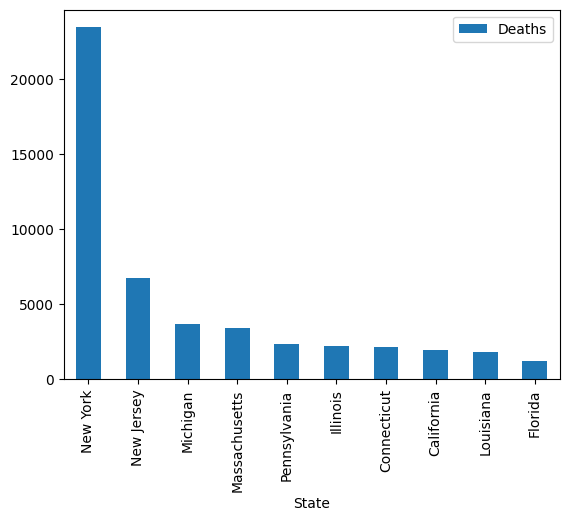

In [50]:
top_10_USDeath_States.plot.bar()

qn 8

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


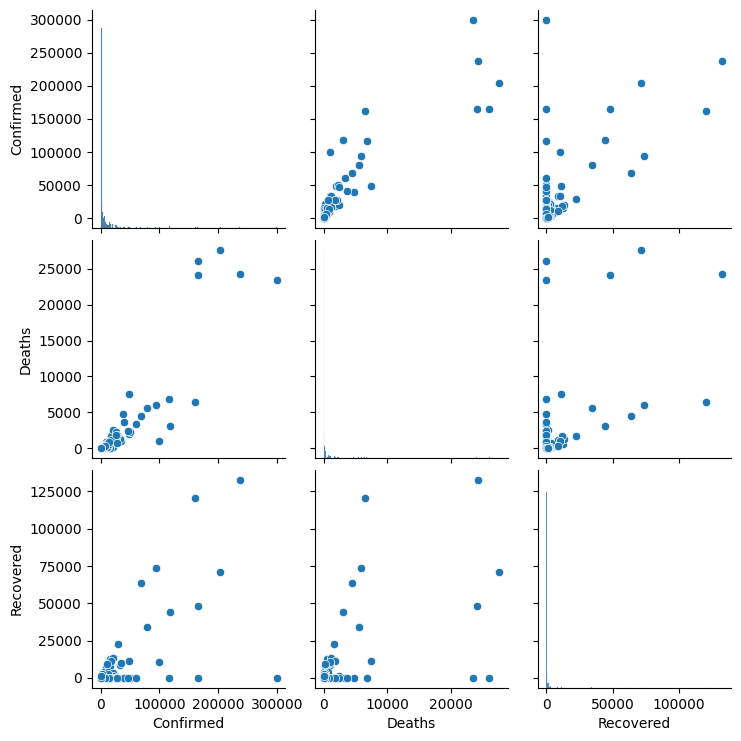

In [53]:
sns.pairplot(df[['Confirmed','Deaths','Recovered']])